<a href="https://colab.research.google.com/github/Maisha1714/CodeAlpha_Emotion_Recognition_from_Speech/blob/main/Disease_Prediction_with_Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [99]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [100]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [12]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [26]:
cat_cols = [feature for feature in train.columns if train[feature].dtypes == 'O']
num_cols = [feature for feature in train.columns if feature not in cat_cols]

In [27]:
print(f"Numerical : {num_cols}\n")
print(f"Categorical : {cat_cols}")

Numerical : ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']

Categorical : ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [29]:
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 12
Unique values: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan'

In [33]:
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [34]:
train['ethnicity'] = np.where(train['ethnicity'] == '?', 'Others',train['ethnicity'])
train['relation'] = np.where(train['relation'] == '?', 'Others', train['relation'])

In [35]:
for feature in ['ethnicity','relation']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 11
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


relation:
Number of unique values in the relation: 5
Unique values: ['Self' 'Relative' 'Parent' 'Others' 'Health care professional']




In [101]:

train['ethnicity']= np.where(train['ethnicity'] == 'others', 'Others', train['ethnicity'])

In [37]:
for feature in ['ethnicity']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']




In [39]:
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Arge

In [102]:
train.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


**It seems there are no missing values in the dataset**




In [42]:

train['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [43]:
639/(161+639)*100

79.875

This means that almost 80% of the target values are of single category.

**The dataset seems to be unbalanced**

In [44]:
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation']

In [47]:
train_copy = train.copy()

In [46]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=60, dtype=np.int64)

train[cat_cols] = oe.fit_transform(train[cat_cols])

In [48]:
for feature in cat_cols:
    print(f"Unique values in {feature}:")
    print(f"{train[feature].unique()}\n")

Unique values in gender:
[0 1]

Unique values in ethnicity:
[5 9 4 6 1 2 0 8 7 3]

Unique values in jaundice:
[0 1]

Unique values in austim:
[0 1]

Unique values in contry_of_res:
[ 7 25 54 46 31 53 13 36 15 32 52  6 51 27 21 33 55 19 35  0 39 29  1  9
 43 28  5 48 42 12  8  4 44 20 49 24 23  2 16 22 47 50 40 26  3 30 34 37
 45 18 38 41 17 11 14 10]

Unique values in used_app_before:
[0 1]

Unique values in relation:
[4 3 2 1 0]



In [49]:
train[cat_cols].head()

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
0,0,5,0,0,7,0,4
1,1,5,0,0,25,0,4
2,1,9,0,1,54,0,4
3,0,5,0,0,54,0,4
4,1,5,0,0,46,0,4


In [ ]:
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,7,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,25,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,54,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,54,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,46,0,-4.777286,4,0


## Data Visualization

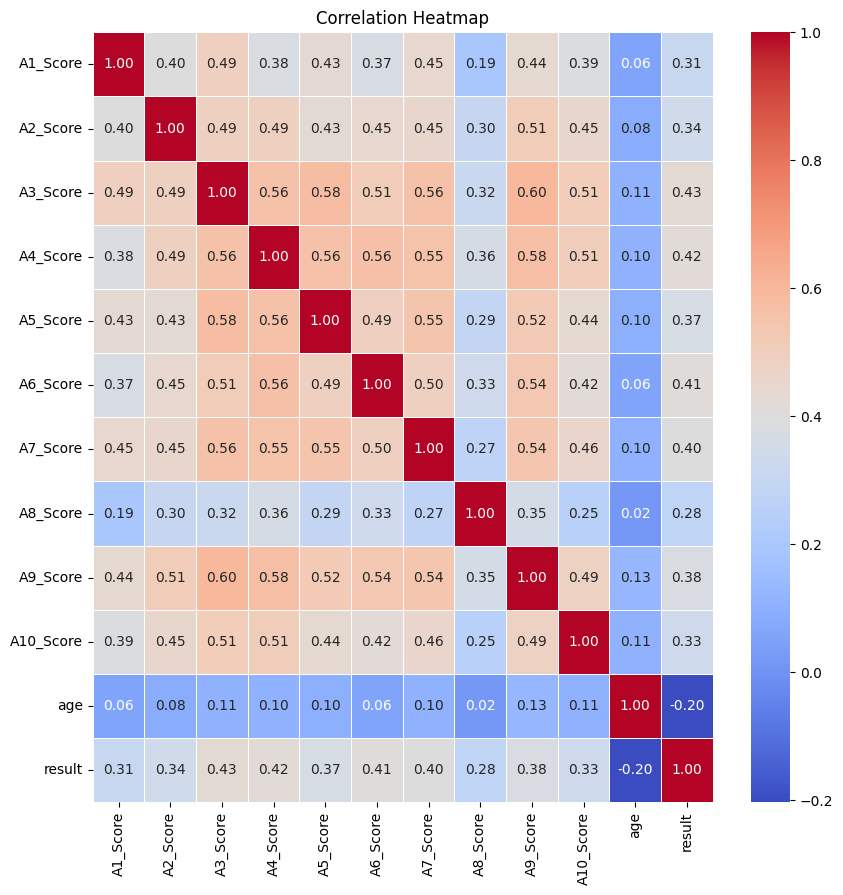

In [62]:
features_hm = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

correlation_matrix = train[features_hm].corr()

plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>,
        <Axes: title={'center': 'A4_Score'}>],
       [<Axes: title={'center': 'A5_Score'}>,
        <Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>,
        <Axes: title={'center': 'A8_Score'}>],
       [<Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'ethnicity'}>,
        <Axes: title={'center': 'jaundice'}>,
        <Axes: title={'center': 'austim'}>,
        <Axes: title={'center': 'contry_of_res'}>],
       [<Axes: title={'center': 'used_app_before'}>,
        <Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'relation'}>,
        <Axes: title={'center': 'Class/ASD'}>]], dtype=object)

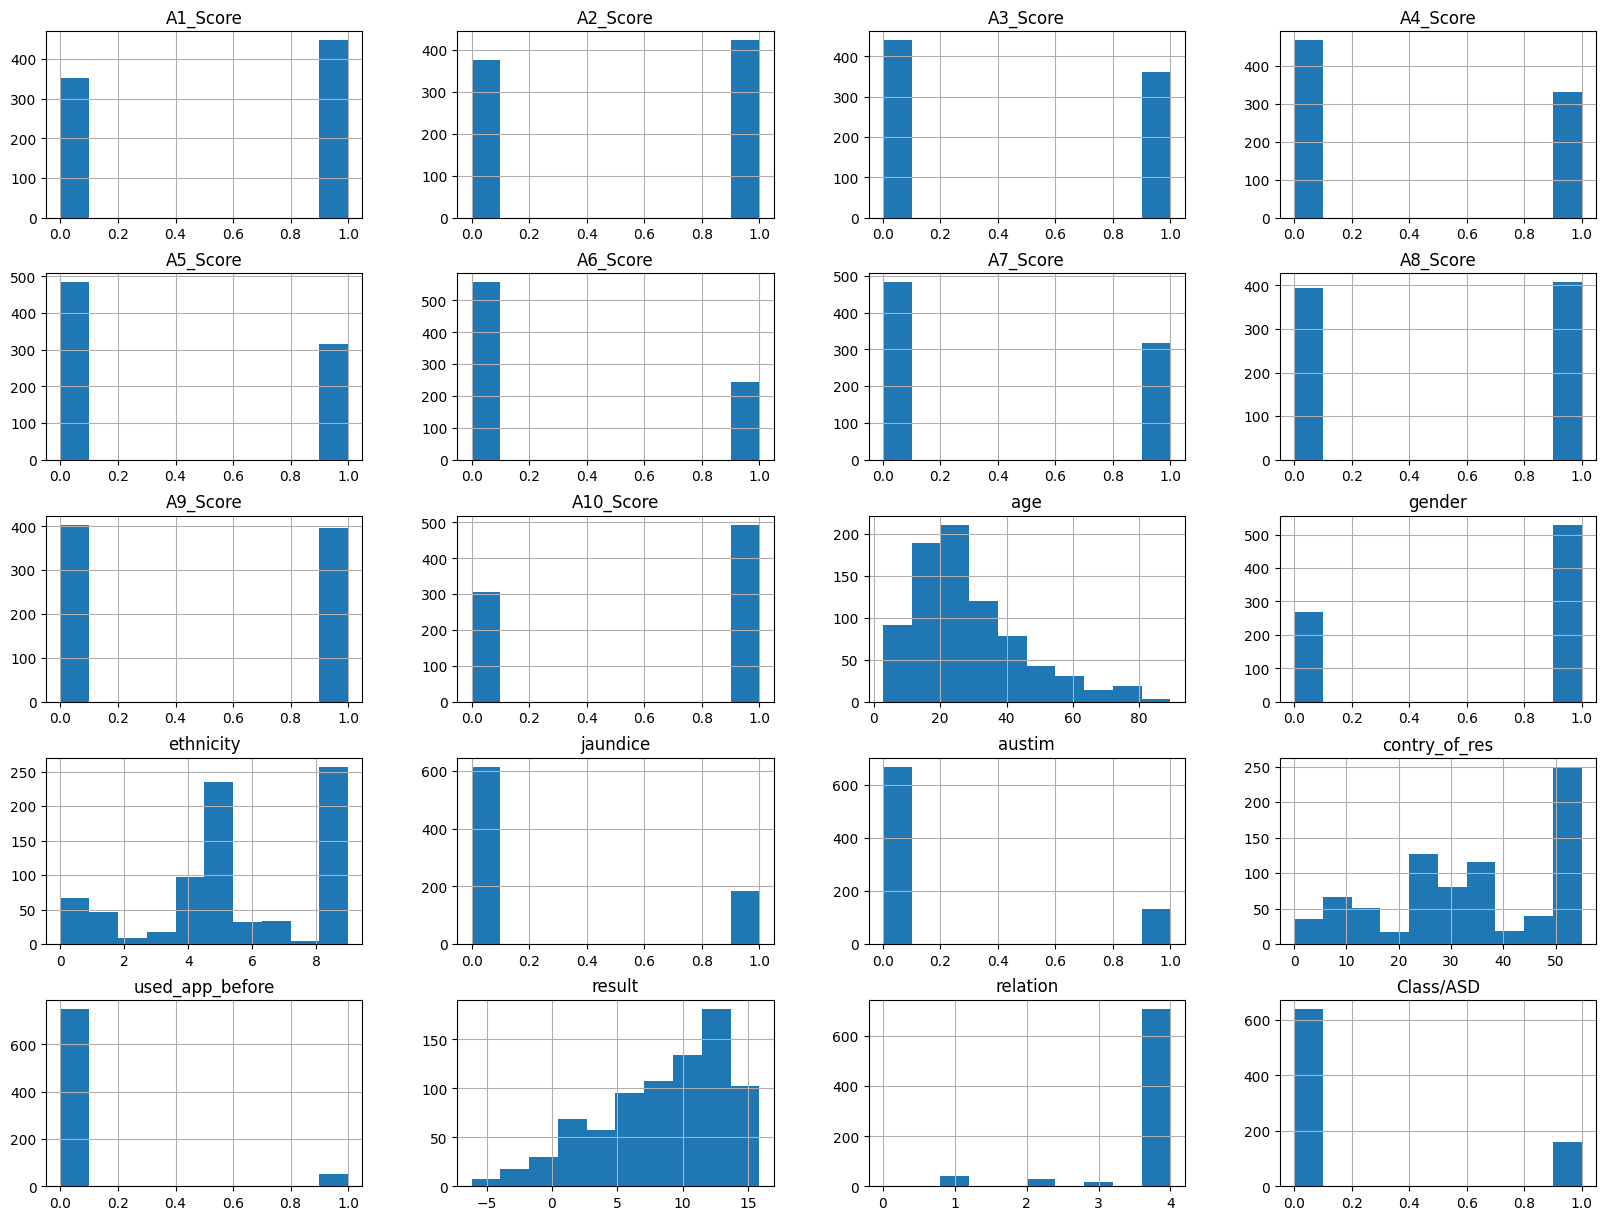

In [63]:
train.hist(figsize=(20,15))

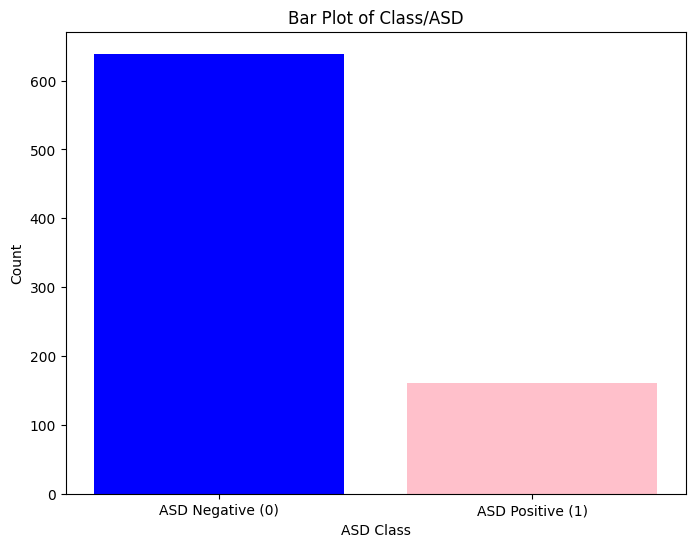

In [67]:
counts = train['Class/ASD'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['Blue', 'pink'])
plt.title('Bar Plot of Class/ASD')
plt.xlabel('ASD Class')
plt.ylabel('Count')
plt.xticks(counts.index, labels=['ASD Negative (0)', 'ASD Positive (1)'])
plt.show()


<Axes: ylabel='Density'>

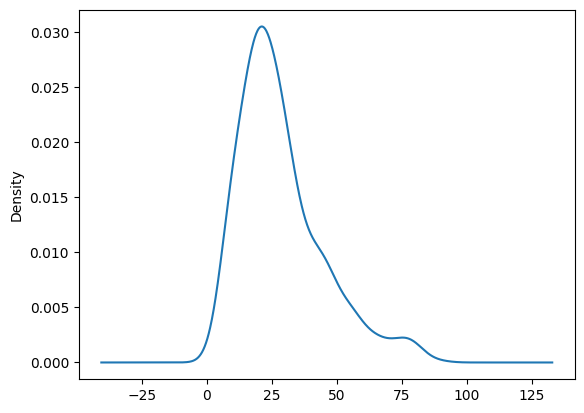

In [53]:
train['age'].plot(kind='kde')

In [54]:
asd_positive = train_copy[train_copy['Class/ASD'] == 1]

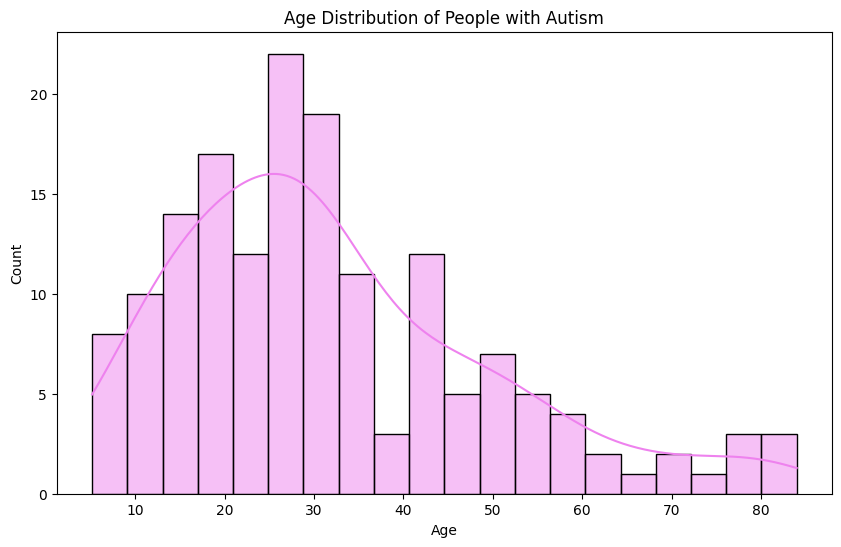

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(asd_positive['age'], bins=20, kde=True, color='violet')
plt.title('Age Distribution of People with Autism')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-69-e1a1518f4eb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=asd_positive, palette='plasma')


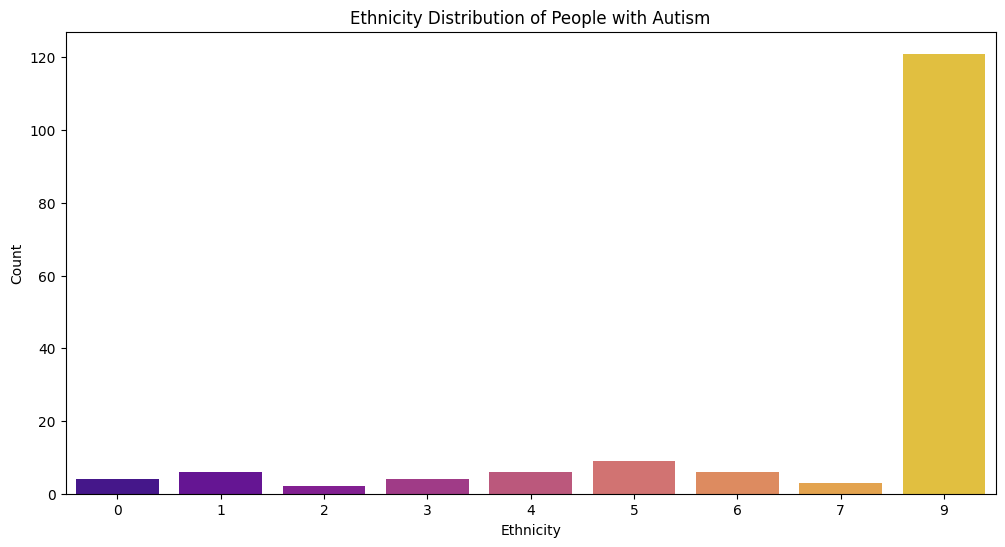

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', data=asd_positive, palette='plasma')
plt.title('Ethnicity Distribution of People with Autism')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

<ipython-input-71-905a9ae3652a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=asd_positive, palette='inferno')


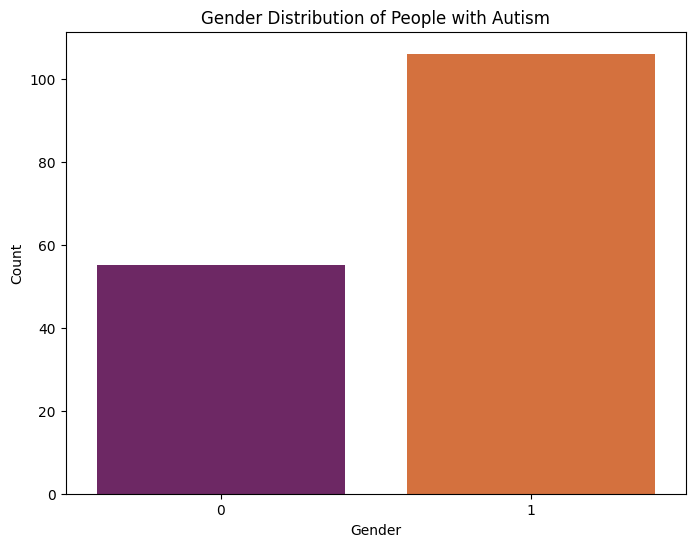

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=asd_positive, palette='inferno')
plt.title('Gender Distribution of People with Autism')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-77-77e068a0e87d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jaundice', data=asd_positive, palette='cividis')


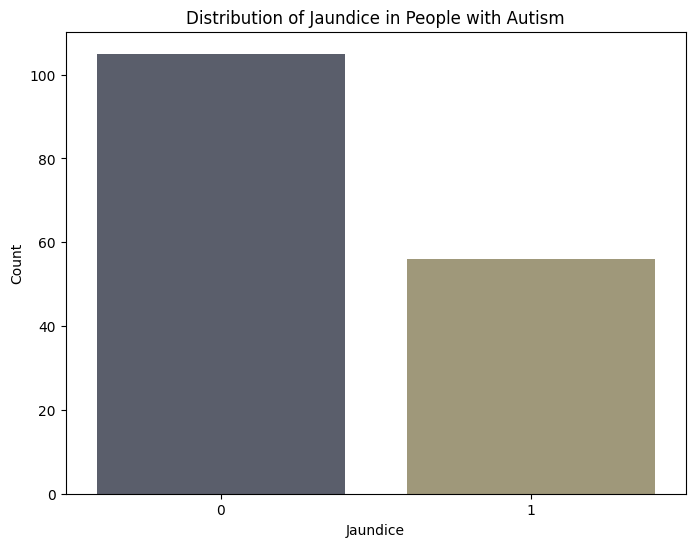

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='jaundice', data=asd_positive, palette='cividis')
plt.title('Distribution of Jaundice in People with Autism')
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.show()

## Model Training

In [78]:
X_train = train.drop('Class/ASD', axis=1)
y_train = train['Class/ASD']

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
lr = LogisticRegression(random_state=234, max_iter=3000)
svc = SVC(random_state=567,probability=True)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(max_depth=3, n_jobs=-1)
adab = AdaBoostClassifier(n_estimators=100, random_state=32389)
gradb = GradientBoostingClassifier(random_state=34990)

In [82]:
model_lst = [lr, svc, knc, rfc, adab, gradb]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=10, scoring = 'roc_auc', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")

Cross validation score for the LogisticRegression(max_iter=3000, random_state=234): 0.905

Cross validation score for the SVC(probability=True, random_state=567): 0.868

Cross validation score for the KNeighborsClassifier(): 0.811

Cross validation score for the RandomForestClassifier(max_depth=3, n_jobs=-1): 0.915

Cross validation score for the AdaBoostClassifier(n_estimators=100, random_state=32389): 0.876

Cross validation score for the GradientBoostingClassifier(random_state=34990): 0.896



In [83]:
from sklearn.metrics import roc_auc_score
import random

vc = VotingClassifier(estimators=
                     [('lr',lr), ('svc', svc), ('rfc', rfc), ('knc', knc)], voting='soft')
vc.fit(X_train, y_train)
vc_scores = vc.predict_proba(X_train)[:,1]
vc_roc_auc_score = np.round(roc_auc_score(y_train, vc_scores),3)
print(f"Cross validation score for the voting classifier: {vc_roc_auc_score}")

Cross validation score for the voting classifier: 0.938


In [84]:
vc2 = VotingClassifier(estimators=
                     [('lr',lr),('rfc', rfc), ('adab',adab), ('gradb', gradb)], voting='soft')
vc2.fit(X_train, y_train)
vc2_scores = vc2.predict_proba(X_train)[:,1]
vc2_roc_auc_score = np.round(roc_auc_score(y_train, vc2_scores),3)
print(f"Cross validation score for the voting classifier: {vc2_roc_auc_score}")

Cross validation score for the voting classifier: 0.965


In [85]:
estimators = [('vc',vc), ('vc2', vc2)]

sc = StackingClassifier(estimators=estimators, final_estimator=rfc)
sc.fit(X_train, y_train)
sc_score = sc.predict_proba(X_train)[:,1]
sc_roc_auc_score = np.round(roc_auc_score(y_train, sc_score), 3)
print(f"Cross validation score for the stacking classifier: {sc_roc_auc_score}")

Cross validation score for the stacking classifier: 0.953


**Voting classifier number 2 seems to be the best model out of all**

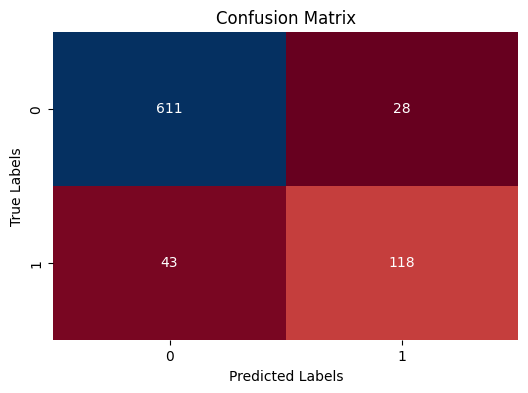

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


predicted = vc2.predict(X_train)

cm = confusion_matrix(y_train, predicted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="RdBu", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, predicted)

precision = precision_score(y_train, predicted)

recall = recall_score(y_train, predicted)

f1 = f1_score(y_train, predicted)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.911
Precision: 0.808
Recall: 0.733
F1 Score: 0.769


In [91]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [92]:
cat_cols_test = [feature for feature in test.columns if test[feature].dtypes == 'O']
num_cols_test = [feature for feature in test.columns if feature not in cat_cols_test]

In [93]:
print(f"Numerical columns: {num_cols_test}\n")
print(f"Categorical columns: {cat_cols_test}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [104]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['m' 'f']


ethnicity:
Number of unique values in the ethnicity: 11
Unique values: ['White-European' 'Asian' '?' 'Middle Eastern ' 'South Asian' 'Pasifika'
 'Turkish' 'Latino' 'Black' 'Others' 'Hispanic']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['yes' 'no']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 35
Unique values: ['India' 'Mexico' 'Egypt' 'Italy' 'Australia' 'United States' 'Jordan'
 'Burundi' 'United Kingdom' 'Canada' 'Germany' 'Russia' 'Spain' 'Austria'
 'Iran' 'New Zealand' 'Bolivia' 'United Arab Emirates' 'Uruguay' 'Lebanon'
 'France' 'Netherlands' 'Bahamas' 'Iceland' 'Sri Lanka' 'Afghanistan'
 'Pakistan' 'Malaysia' 'Aruba' 'Ireland' 'Viet Nam' 'Tonga' 'Philippines'
 'Azerbaijan' 'Czech Republic']


used_app_before:
Number of unique values in the used_app_before: 2
Unique values: ['no' 'y

In [105]:
test['ethnicity'] = np.where(test['ethnicity'] == '?', 'Others', test['ethnicity'])
test['relation'] = np.where(test['relation'] == '?', 'Others', test['relation'])

In [106]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['m' 'f']


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['White-European' 'Asian' 'Others' 'Middle Eastern ' 'South Asian'
 'Pasifika' 'Turkish' 'Latino' 'Black' 'Hispanic']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['yes' 'no']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 35
Unique values: ['India' 'Mexico' 'Egypt' 'Italy' 'Australia' 'United States' 'Jordan'
 'Burundi' 'United Kingdom' 'Canada' 'Germany' 'Russia' 'Spain' 'Austria'
 'Iran' 'New Zealand' 'Bolivia' 'United Arab Emirates' 'Uruguay' 'Lebanon'
 'France' 'Netherlands' 'Bahamas' 'Iceland' 'Sri Lanka' 'Afghanistan'
 'Pakistan' 'Malaysia' 'Aruba' 'Ireland' 'Viet Nam' 'Tonga' 'Philippines'
 'Azerbaijan' 'Czech Republic']


used_app_before:
Number of unique values in the used_app_before: 2
Unique values: ['no' 'yes']

In [107]:
test.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [108]:
test.drop(['ID','age_desc'],axis=1,inplace=True)

In [118]:
test.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation'],
      dtype='object')

In [120]:
print(f"Numerical columns: {num_cols_test}\n")
print(f"Categorical columns: {cat_cols_test}")

Numerical columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [121]:
test[cat_cols_test] = oe.transform(test[cat_cols_test])

In [ ]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: [1 0]


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: [9 0 5 4 7 6 8 3 1 2]


jaundice:
Number of unique values in the jaundice: 2
Unique values: [1 0]


austim:
Number of unique values in the austim: 2
Unique values: [0 1]


contry_of_res:
Number of unique values in the contry_of_res: 33
Unique values: [25 34 19 29  6 54 31 14 53 15 22 42 47  7 26 36 12 52 60 21 35  9 24 48
  0 40 33  5 28 55 50  8 18]


used_app_before:
Number of unique values in the used_app_before: 2
Unique values: [0 1]


relation:
Number of unique values in the relation: 5
Unique values: [4 2 1 3 0]




In [122]:
test.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation'],
      dtype='object')

test.head

### Making predictions for the test data using the trained voting classifier number 2

In [123]:
final_predictions = vc2.predict(test)

In [124]:
final_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [125]:
len(final_predictions)

200